In [1]:
# COMP-551 Mini-Project #1.
# Task 3: Written by Ryan Wilson.

# Data in 'finalNormalTotal_NEW.csv' previously cleaned (Task 1: Dean Meluban).
# Encoding = UTF-8.

# Import pandas, numpy and matplotlib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing & classifier modules from scikit-learn.
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

# Import summary stats module from scipy.
from scipy import stats

# Read data from file 'finalNormalTotal_NEW.csv'.
# Data file stored in same directory as python process.
data = pd.read_csv('finalNormalTotal_NEW.csv')

# Set up print options (formatting) for np arrays (can adjust sig digits).
np.set_printoptions(formatter={'float': '{:0.4f}'.format})

# Preview the data to ensure proper import.
print()
print(data)
print()

# Display data information summary.
data.info()
print()


    country_region sub_region_1        date  Adrenal crisis   Ageusia  \
0    United States       Alaska  2020-03-23        0.242395  1.000000   
1    United States       Alaska  2020-03-30        0.134936  0.282752   
2    United States       Alaska  2020-04-06        0.189892  0.131008   
3    United States       Alaska  2020-04-13        0.001472       NaN   
4    United States       Alaska  2020-04-20        0.058391       NaN   
..             ...          ...         ...             ...       ...   
125  United States      Wyoming  2020-09-07        0.029605  0.210046   
126  United States      Wyoming  2020-09-14        0.066729  0.602740   
127  United States      Wyoming  2020-09-21        0.136748  0.305936   
128  United States      Wyoming  2020-09-28        0.331767  0.504566   
129  United States      Wyoming  2020-10-05        0.034305  1.000000   

     Allergic conjunctivitis  Amenorrhea  Angular cheilitis   Anosmia  \
0                        NaN    0.190876         

In [2]:

# Group data & split into region-based dataframes.
grouped_data = data.groupby(data['sub_region_1'])

grouped_Alaska = grouped_data.get_group('Alaska')
minus_Alaska = data[data.sub_region_1 != 'Alaska']

grouped_Montana = grouped_data.get_group('Montana')
minus_Montana = data[data.sub_region_1 != 'Montana']

grouped_NDakota = grouped_data.get_group('North Dakota')
minus_NDakota = data[data.sub_region_1 != 'North Dakota']

grouped_SDakota = grouped_data.get_group('South Dakota')
minus_SDakota = data[data.sub_region_1 != 'South Dakota']

grouped_Vermont = grouped_data.get_group('Vermont')
minus_Vermont = data[data.sub_region_1 != 'Vermont']

grouped_Wyoming = grouped_data.get_group('Wyoming')
minus_Wyoming = data[data.sub_region_1 != 'Wyoming']

# Group data & split into time-based dataframes (c/o 2020-08-10).
grouped_data2 = data.groupby(data['date'])

pre_cutoff = data[data.date <= '2020-08-10']
post_cutoff = data[data.date > '2020-08-10']



In [3]:
# Split into respective region- & time-based training and test sets.
X_train1, y_train1 = minus_Alaska.iloc[:, 3:103], minus_Alaska.iloc[:, 103]
X_train1, y_train1 = X_train1.fillna(X_train1.mean()), y_train1.fillna(y_train1.mean()).astype(int)
X_test1, y_test1 = grouped_Alaska.iloc[:, 3:103], grouped_Alaska.iloc[:, 103]
X_test1, y_test1 = X_test1.fillna(X_test1.mean()), y_test1.fillna(y_test1.mean()).astype(int)

print(X_train1)
print(y_train1)

X_train2, y_train2 = minus_Montana.iloc[:, 3:103], minus_Montana.iloc[:, 103]
X_train2, y_train2 = X_train2.fillna(X_train2.mean()), y_train2.fillna(y_train2.mean()).astype(int)
X_test2, y_test2 = grouped_Montana.iloc[:, 3:103], grouped_Montana.iloc[:, 103]
X_test2, y_test2 = X_test2.fillna(X_test2.mean()), y_test2.fillna(y_test2.mean()).astype(int)

X_train3, y_train3 = minus_NDakota.iloc[:, 3:103], minus_NDakota.iloc[:, 103]
X_train3, y_train3 = X_train3.fillna(X_train3.mean()), y_train3.fillna(y_train3.mean()).astype(int)
X_test3, y_test3 = grouped_NDakota.iloc[:, 3:103], grouped_NDakota.iloc[:, 103]
X_test3, y_test3 = X_test3.fillna(X_test3.mean()), y_test3.fillna(y_test3.mean()).astype(int)

X_train4, y_train4 = minus_SDakota.iloc[:, 3:103], minus_SDakota.iloc[:, 103]
X_train4, y_train4 = X_train4.fillna(X_train4.mean()), y_train4.fillna(y_train4.mean()).astype(int)
X_test4, y_test4 = grouped_SDakota.iloc[:, 3:103], grouped_SDakota.iloc[:, 103]
X_test4, y_test4 = X_test4.fillna(X_test4.mean()), y_test4.fillna(y_test4.mean()).astype(int)

X_train5, y_train5 = minus_Vermont.iloc[:, 3:103], minus_Vermont.iloc[:, 103]
X_train5, y_train5 = X_train5.fillna(X_train5.mean()), y_train5.fillna(y_train5.mean()).astype(int)
X_test5, y_test5 = grouped_Vermont.iloc[:, 3:103], grouped_Vermont.iloc[:, 103]
X_test5, y_test5 = X_test5.fillna(X_test5.mean()), y_test5.fillna(y_test5.mean()).astype(int)

X_train6, y_train6 = minus_Wyoming.iloc[:, 3:103], minus_Wyoming.iloc[:, 103]
X_train6, y_train6 = X_train6.fillna(X_train6.mean()), y_train6.fillna(y_train6.mean()).astype(int)
X_test6, y_test6 = grouped_Wyoming.iloc[:, 3:103], grouped_Wyoming.iloc[:, 103]
X_test6, y_test6 = X_test6.fillna(X_test6.mean()), y_test6.fillna(y_test6.mean()).astype(int)

X_train_time, y_train_time = post_cutoff.iloc[:, 3:103], post_cutoff.iloc[:, 103]
X_train_time, y_train_time = X_train_time.fillna(X_train_time.mean()), y_train_time.fillna(y_train_time.mean()).astype(int)
X_test_time, y_test_time = pre_cutoff.iloc[:, 3:103], pre_cutoff.iloc[:, 103]
X_test_time, y_test_time = X_test_time.fillna(X_test_time.mean()), y_test_time.fillna(y_test_time.mean()).astype(int)



     Adrenal crisis   Ageusia  Allergic conjunctivitis  Amenorrhea  \
11         0.116649  0.684261                 0.058623    0.147939   
12         0.193633  0.330684                 0.236198    0.351657   
13         0.104906  0.171701                 0.000000    0.535166   
14         0.184499  0.211765                 0.094479    0.414713   
15         0.228079  0.147218                 0.114400    0.587712   
..              ...       ...                      ...         ...   
125        0.029605  0.210046                 0.000000    0.409485   
126        0.066729  0.602740                 0.342749    1.000000   
127        0.136748  0.305936                 0.342749    0.437326   
128        0.331767  0.504566                 0.342749    0.111421   
129        0.034305  1.000000                 0.342749    0.000000   

     Angular cheilitis   Anosmia  Asphyxia  Atheroma  Auditory hallucination  \
11            0.322951  1.000000  0.083526  0.277423                0.240031   

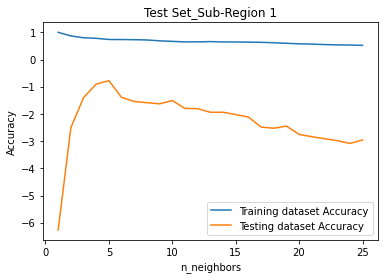

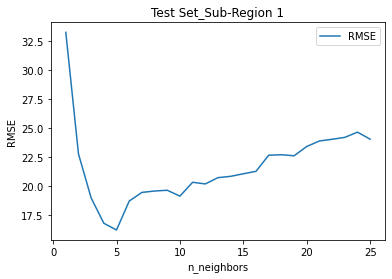

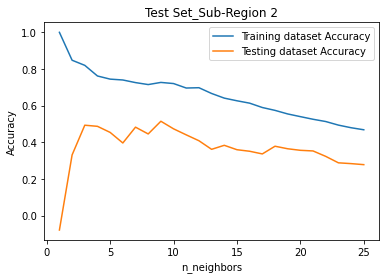

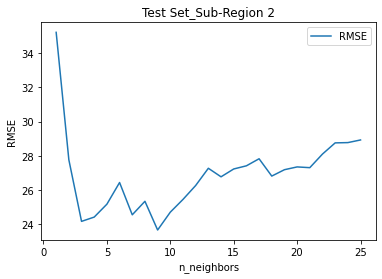

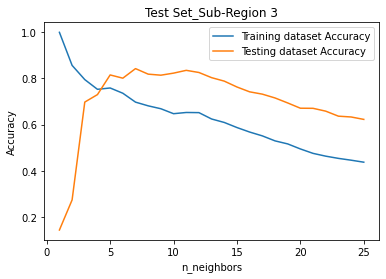

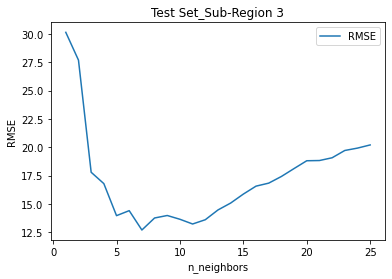

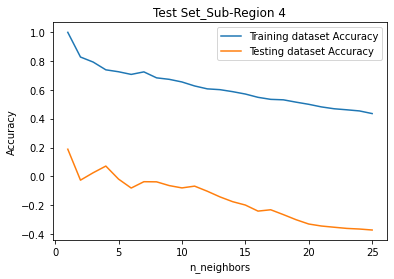

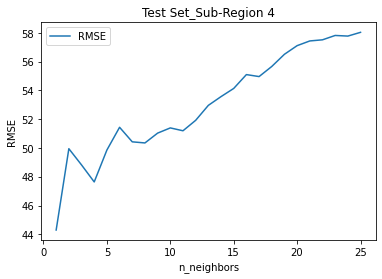

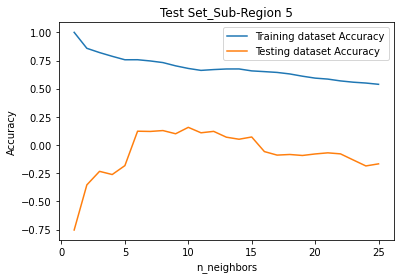

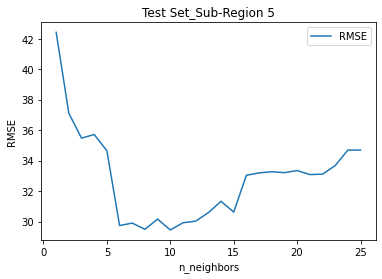

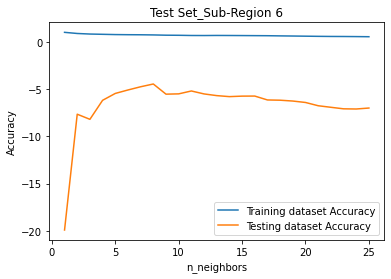

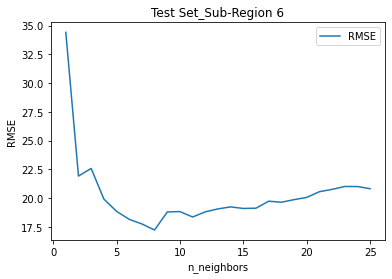

In [4]:
# Initialize arrays to pull data for future calculations.
neighbors = np.arange(1, 26)
nfolds = 6

train_accuracy = []
test_accuracy = []
RMSE = []

for a in range(0, nfolds):
    train_accuracy2 = []
    train_accuracy.append(train_accuracy2)

for b in range(0, nfolds):
    test_accuracy2 = []
    test_accuracy.append(test_accuracy2)

for c in range(0, nfolds):
    RMSE2 = []
    RMSE.append(RMSE2)

# Fit & train KNN model on 6-fold region-based strategy.
for i in range(1, nfolds+1):
    X_train = globals()[f"X_train{i}"]
    X_test = globals()[f"X_test{i}"]
    y_train = globals()[f"y_train{i}"]
    y_test = globals()[f"y_test{i}"]

    # Loop over 'K' values.
    for j, k in enumerate(neighbors):
        knn = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='euclidean')
        knn.fit(X_train, y_train.values.reshape(-1))
        y_hat = knn.predict(X_test).astype(int)

        # Compute & store training and test data accuracies.
        train_accuracy_temp = knn.score(X_train, y_train)
        train_accuracy[i-1].append(train_accuracy_temp)

        test_accuracy_temp = knn.score(X_test, y_test)
        test_accuracy[i-1].append(test_accuracy_temp)

        # Compute & store RMSE (root mean squared error) values.
        RMSE_temp = np.sqrt(mean_squared_error(y_test, y_hat))
        RMSE[i-1].append(RMSE_temp)

        """
        plt.scatter(y_test, y_hat, c='b', marker='o')
        plt.title(f"Cross-Validation Set {i}, K-Neighbors={k}")
        plt.xlabel(f"y_test")
        plt.ylabel(f"y_hat")
        plt.legend(loc='lower left')
        plt.show()

        print(f"Predicted Hospitalizations (Test Set {i}):")
        print(y_hat)
        print()

        # Calculate model classification statistics.
        c_matrix = confusion_matrix(y_test, y_hat)
        print(f"Confusion Matrix (Test Set {i}):")
        print(c_matrix)
        print()

        y_true, y_pred = y_test, knn.predict(X_test)
        print(f"Classification Report (Test Set {i}):")
        print(classification_report(y_true, y_pred))
        """
    
    # Generate plots to evaluate appropriate number 'K' neighbors.
    plt.plot(neighbors, train_accuracy[i-1], label = 'Training dataset Accuracy')
    plt.plot(neighbors, test_accuracy[i-1], label = 'Testing dataset Accuracy')
    plt.legend()
    plt.title(f"Test Set_Sub-Region {i}")
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.show()

    plt.plot(neighbors, RMSE[i-1], label = 'RMSE')
    plt.legend()
    plt.title(f"Test Set_Sub-Region {i}")
    plt.xlabel('n_neighbors')
    plt.ylabel('RMSE')
    plt.show()

# Zip train/test accuracies & RMSE to k_neighbor arrays.
k_train_accuracy = list(map(list, zip(*train_accuracy)))
k_test_accuracy = list(map(list, zip(*test_accuracy)))
k_RMSE = list(map(list, zip(*RMSE)))

# Initialize arrays to store K-hyperparameter metrics.
mean_k_train_accuracy = []
mean_k_test_accuracy = []
mean_k_RMSE = []

# Compute metrics based on each K-hyperparameter.
for m in range(0, 25):
    mean_k_train_accuracy_temp = np.mean(k_train_accuracy[m])
    mean_k_train_accuracy.append(mean_k_train_accuracy_temp)

    mean_k_test_accuracy_temp = np.mean(k_test_accuracy[m])
    mean_k_test_accuracy.append(mean_k_test_accuracy_temp)

    mean_k_RMSE_temp = np.mean(k_RMSE[m])
    mean_k_RMSE.append(mean_k_RMSE_temp)

In [5]:
# Print region-based summary tables (training/testing accuracy & RMSE).
train_accuracy_table = pd.DataFrame(train_accuracy)
train_accuracy_table.loc['Mean (KNN)'] = train_accuracy_table.mean()
train_accuracy_table['Mean (nFold)'] = train_accuracy_table.mean(numeric_only=True, axis=1)
print("Table: Training Accuracy (Region-Based):")
print(train_accuracy_table)
print()

test_accuracy_table = pd.DataFrame(test_accuracy)
test_accuracy_table.loc['Mean (KNN)'] = test_accuracy_table.mean()
test_accuracy_table['Mean (nFold)'] = test_accuracy_table.mean(numeric_only=True, axis=1)
print("Table: Testing Accuracy (Region-Based):")
print(test_accuracy_table)
print()

RMSE_table = pd.DataFrame(RMSE)
RMSE_table.loc['Mean (KNN)'] = RMSE_table.mean()
RMSE_table['Mean (nFold)'] = RMSE_table.mean(numeric_only=True, axis=1)
print("Table: RMSE (Region-Based):")
print(RMSE_table)
print()

train_accuracy_table.to_csv('KNN_train_accuracy_table.csv')
test_accuracy_table.to_csv('KNN_test_accuracy_table.csv')
RMSE_table.to_csv('KNN_RMSE_table.csv')

Table: Training Accuracy (Region-Based):
              0         1         2         3         4         5         6  \
0           1.0  0.868028  0.800851  0.779672  0.737599  0.734740  0.729202   
1           1.0  0.847788  0.819898  0.761896  0.744735  0.740040  0.725789   
2           1.0  0.856817  0.795216  0.753121  0.758904  0.736126  0.697599   
3           1.0  0.828534  0.793571  0.739657  0.726256  0.707800  0.725326   
4           1.0  0.858221  0.820443  0.787259  0.756532  0.756901  0.746054   
5           1.0  0.879437  0.819872  0.791483  0.763569  0.750015  0.742272   
Mean (KNN)  1.0  0.856471  0.808309  0.768848  0.747933  0.737604  0.727707   

                   7         8         9  ...        16        17        18  \
0           0.719452  0.686936  0.667703  ...  0.633381  0.617170  0.597276   
1           0.715041  0.726759  0.720582  ...  0.589844  0.574245  0.554782   
2           0.681544  0.668943  0.647465  ...  0.551386  0.529736  0.516578   
3         

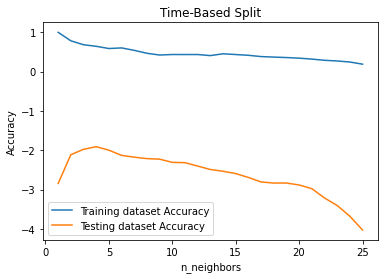

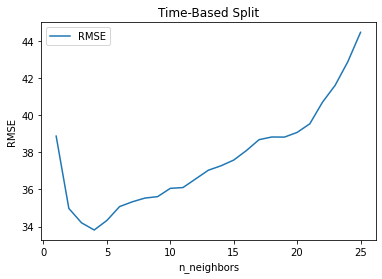

In [6]:
# Fit & train KNN model on time-based (2020-08-10) strategy.
train_accuracy_time = []
test_accuracy_time = []
RMSE_time = []

# Loop over 'K' values.
for n, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train_time, y_train_time.values.reshape(-1))
    y_hat = knn.predict(X_test_time)

    # Compute & store training and test data accuracies.
    train_accuracy_temp = knn.score(X_train_time, y_train_time)
    train_accuracy_time.append(train_accuracy_temp)
    test_accuracy_temp = knn.score(X_test_time, y_test_time)
    test_accuracy_time.append(test_accuracy_temp)

    # Compute & store RMSE (root mean squared error) values.
    RMSE_temp = np.sqrt(mean_squared_error(y_test_time, y_hat))
    RMSE_time.append(RMSE_temp)

    """
    plt.scatter(y_test_time, y_hat, c='b', marker='o')
    plt.title(f"Cross-Validation Set 1, K-Neighbors={k}")
    plt.xlabel(f"y_test")
    plt.ylabel(f"y_hat")
    plt.legend(loc='lower left')
    plt.show()
    
    print(f"Predicted Hospitalizations (Test Set 1):")
    print(y_hat)
    print()

    # Calculate model classification statistics.
    c_matrix = confusion_matrix(y_test_time, y_hat)
    print(f"Confusion Matrix (Test Set 1):")
    print(c_matrix)
    print()

    y_true, y_pred = y_test_time, knn.predict(X_test_time)
    print(f"Classification Report (Test Set 1):")
    print(classification_report(y_true, y_pred))
    """

# Generate plots to evaluate appropriate number 'K' neighbors.
plt.plot(neighbors, train_accuracy_time, label = 'Training dataset Accuracy')
plt.plot(neighbors, test_accuracy_time, label = 'Testing dataset Accuracy')
plt.legend()
plt.title(f"Time-Based Split")
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

plt.plot(neighbors, RMSE_time, label = 'RMSE')
plt.legend()
plt.title(f"Time-Based Split")
plt.xlabel('n_neighbors')
plt.ylabel('RMSE')
plt.show()

In [7]:
# Print time-based summary tables (training/testing accuracy & RMSE).
summary_time_table = pd.DataFrame(train_accuracy_time, columns=['Train'])
summary_time_table['Test'] = test_accuracy_time
summary_time_table['RMSE'] = RMSE_time
summary_time_table.loc['Mean (KNN)'] = summary_time_table.mean()
print("Table: Train/Test Accuracy & RMSE (Time-Based):")
print(summary_time_table)
print()

summary_time_table.to_csv('KNN_summary_time_table.csv')

Table: Train/Test Accuracy & RMSE (Time-Based):
               Train      Test       RMSE
0           1.000000 -2.841658  38.871321
1           0.784196 -2.110431  34.976814
2           0.684500 -1.974379  34.203307
3           0.644708 -1.907338  33.815649
4           0.588285 -1.996603  34.330851
5           0.603977 -2.128221  35.076694
6           0.541937 -2.174160  35.333312
7           0.467356 -2.210610  35.535607
8           0.423281 -2.224617  35.613036
9           0.436424 -2.305888  36.059029
10          0.435204 -2.313782  36.102054
11          0.435850 -2.400015  36.568769
12          0.408642 -2.487380  37.035620
13          0.454316 -2.532475  37.274301
14          0.435463 -2.591012  37.581870
15          0.416083 -2.689608  38.094305
16          0.383967 -2.804125  38.680966
17          0.370619 -2.832432  38.824618
18          0.359020 -2.831326  38.819015
19          0.343298 -2.881287  39.071298
20          0.319810 -2.974034  39.535366
21          0.289486 -3.2110